In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

NDIR = 'normal'
HDIR = 'haptic'
TIMESTEP = 0.02

In [3]:
normalFiles = os.listdir(NDIR)
hapticFiles = os.listdir(HDIR)

In [4]:
df = pd.read_csv(os.path.join(NDIR, normalFiles[0]))

In [5]:
distances = df.iloc[:, 0].values
points = np.linspace(0, len(distances) * TIMESTEP, len(distances))

In [6]:
distances

array([5.697158 , 5.70373  , 5.707178 , ..., 0.866892 , 0.8732457,
       0.8669413], shape=(1622,))

In [7]:
points

array([0.00000000e+00, 2.00123381e-02, 4.00246761e-02, ...,
       3.23999753e+01, 3.24199877e+01, 3.24400000e+01], shape=(1622,))

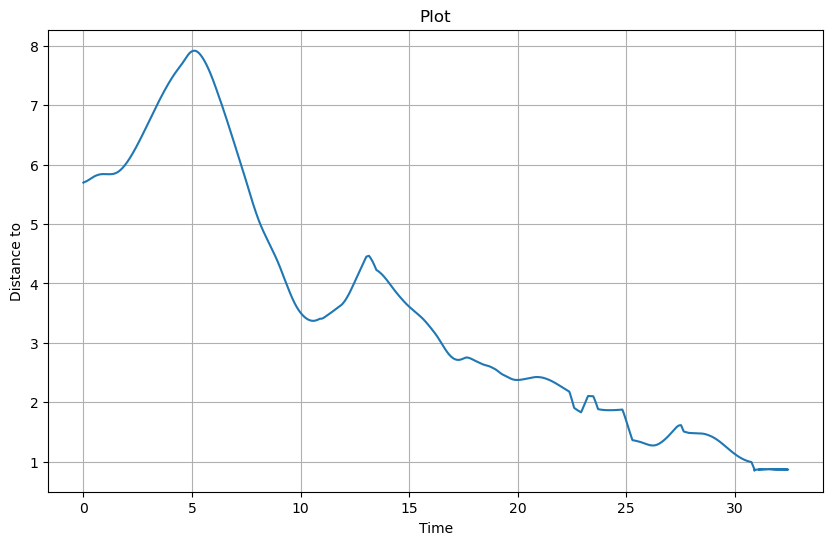

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(points, distances)
plt.xlabel("Time")
plt.ylabel("Distance to")
plt.title('Plot')
plt.grid(True)
plt.show()

In [9]:
def plot_csv(files, column = 0, name = "Marker Distance"):
    plt.figure(figsize=(10, 6))
    plt.xlabel("Time (s)")
    plt.ylabel(name)
    plt.title('Plot')
    plt.grid(True)

    for fn in files:
        df = pd.read_csv(fn)
        distances = df.iloc[:, column].values
        points = np.linspace(0, len(distances) * TIMESTEP, len(distances))
        plt.plot(points, distances)
    
    plt.show()

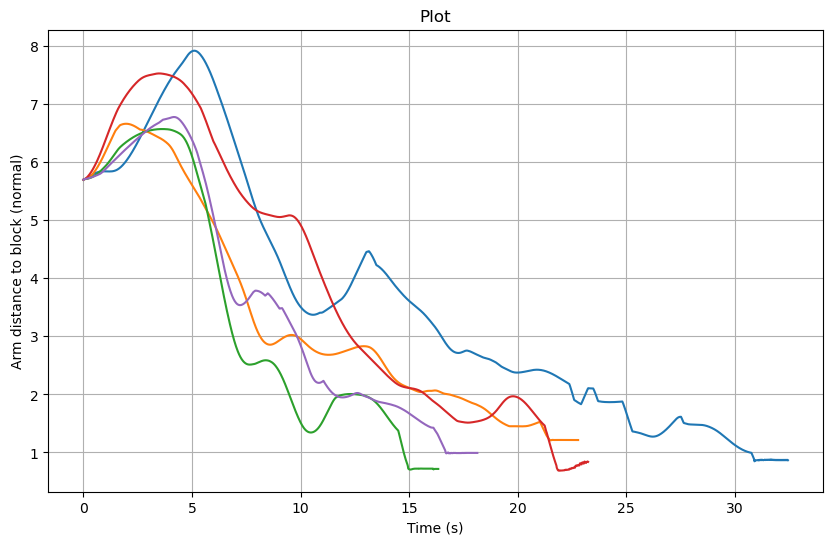

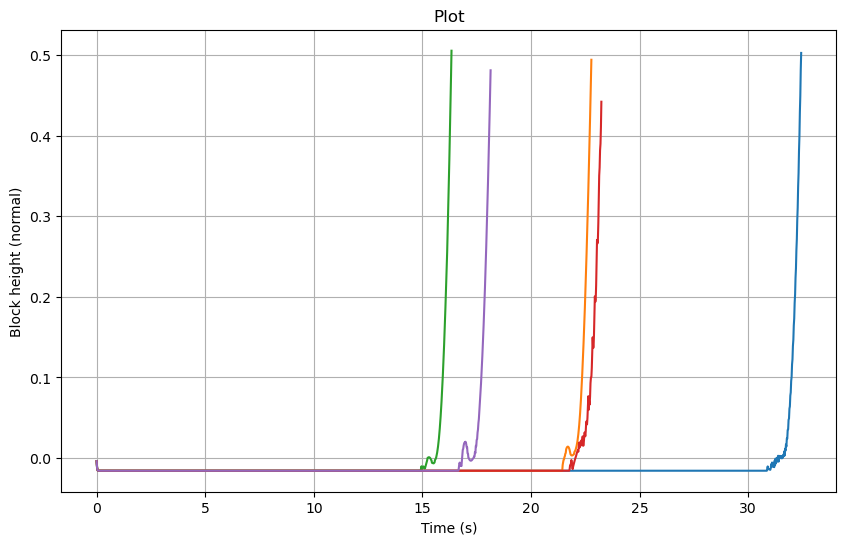

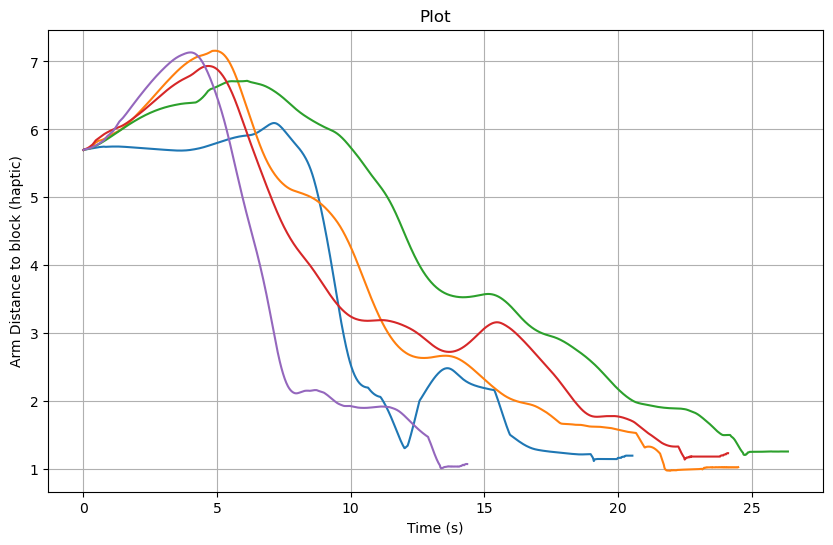

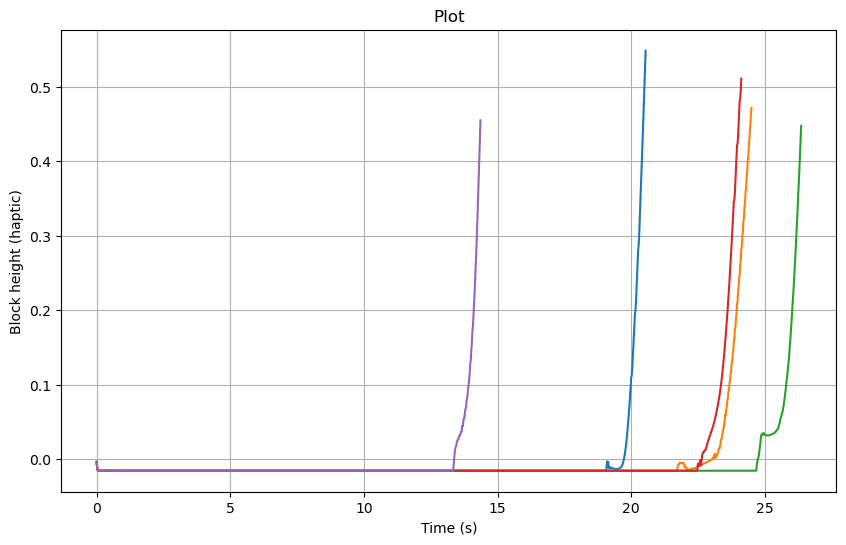

In [13]:

plot_csv([os.path.join(NDIR, x) for x in normalFiles], name = "Arm distance to block (normal)")
plot_csv([os.path.join(NDIR, x) for x in normalFiles], column = 1, name = "Block height (normal)")
# Haptic now
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], name = "Arm Distance to block (haptic)")
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], column = 1, name = "Block height (haptic)")


In [50]:
# Haptic now

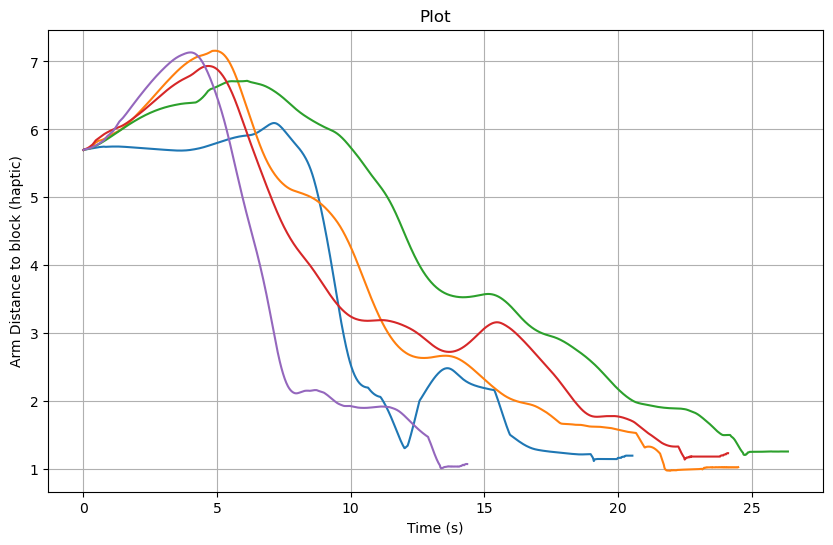

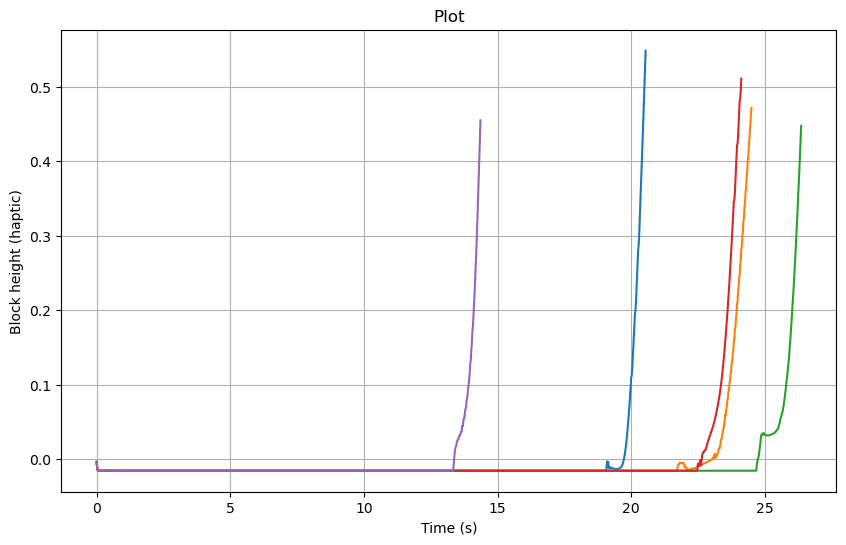

In [14]:
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], name = "Arm Distance to block (haptic)")
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], column = 1, name = "Block height (haptic)")

In [19]:
haptics = []
for fn in hapticFiles:
    df = pd.read_csv(os.path.join(HDIR, fn))
    haptics.append(df)

In [20]:
normals = []
for fn in normalFiles:
    df = pd.read_csv(os.path.join(NDIR, fn))
    normals.append(df)


In [30]:
arr = normals[0]
idx = np.where(arr.iloc[:, 0] < 2)[0][0]
arr[idx:]


,5.693871,0,0.1,0.2,0.3
1126,1.989458,-0.015774,0.70,7.17,5.03
1127,1.963380,-0.015774,0.57,7.39,4.98
1128,1.936992,-0.015774,0.57,7.39,4.98
1129,1.910318,-0.015774,0.57,7.39,4.98
1130,1.900199,-0.015774,0.57,7.39,4.98
...,...,...,...,...,...
1617,0.866851,0.399379,7.32,1.91,6.84
1618,0.873134,0.429175,7.32,1.91,6.84
1619,0.866892,0.449164,7.32,1.91,6.84
1620,0.873246,0.480937,7.32,1.91,6.84


In [98]:
#calculate total acceleration from three fields and combine into one
def process_accel(original):
    result = np.zeros((original.shape[0], 3))

    result[:, 0:2] = original.iloc[:, 0:2]
    result[:, 2] = np.sqrt(np.sum(original.iloc[:, 2:5]**2, axis=1))
    return result

def process_cuts(original, threshold = 2.0):
    index = np.where(original[:, 0] < threshold)[0][0]
    return original[index:]

def process_all(original, threshold = 2.0):
    return process_cuts(process_accel(original), threshold)

In [99]:
arr.shape[0]

1622

In [100]:
result = np.zeros((arr.shape[0], 3))
arr.iloc[:, 2:5]**2

,0.1,0.2,0.3
0,0.0000,0.0000,0.0000
1,13.7641,0.0025,79.5664
2,15.2100,1.0201,72.0801
3,15.2100,1.0201,72.0801
4,15.2100,1.0201,72.0801
...,...,...,...
1617,53.5824,3.6481,46.7856
1618,53.5824,3.6481,46.7856
1619,53.5824,3.6481,46.7856
1620,53.5824,3.6481,46.7856


In [88]:
n = process_accel(arr)

In [89]:
process_all(arr)

array([[ 1.989458  , -0.01577401,  8.78634167],
       [ 1.96338   , -0.01577401,  8.92958006],
       [ 1.936992  , -0.01577401,  8.92958006],
       ...,
       [ 0.866892  ,  0.4491637 , 10.19882836],
       [ 0.8732457 ,  0.4809374 , 10.19882836],
       [ 0.8669413 ,  0.5024844 , 10.24717034]], shape=(496, 3))

In [90]:
def make_plot(arrs, column = 0, name = "Distance to block"):
    plt.figure(figsize=(10, 6))
    plt.xlabel("Time (s)")
    plt.ylabel(name)
    plt.title('Plot')
    plt.grid(True)

    for arr in arrs:
        processed = process_all(arr)
        y_values = processed[:, column]

        points = np.linspace(0, len(y_values) * TIMESTEP, len(y_values))
        plt.plot(points, y_values)
    
    plt.show()

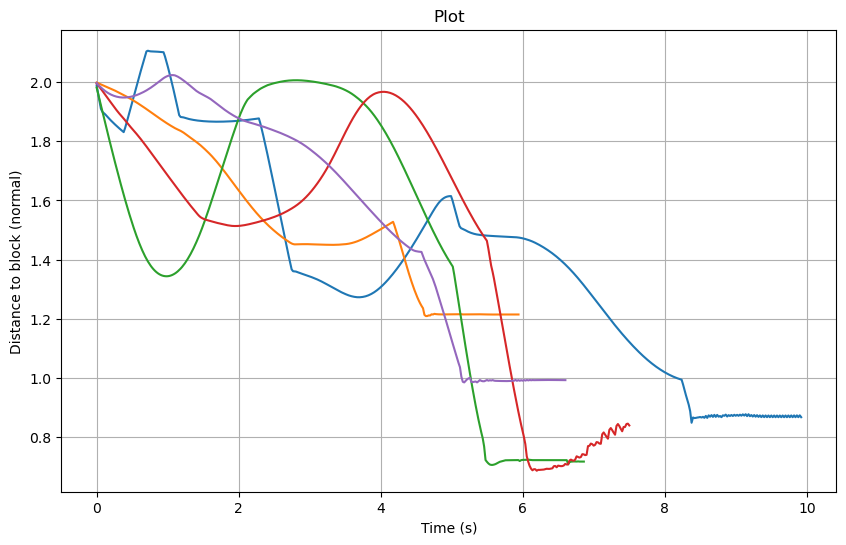

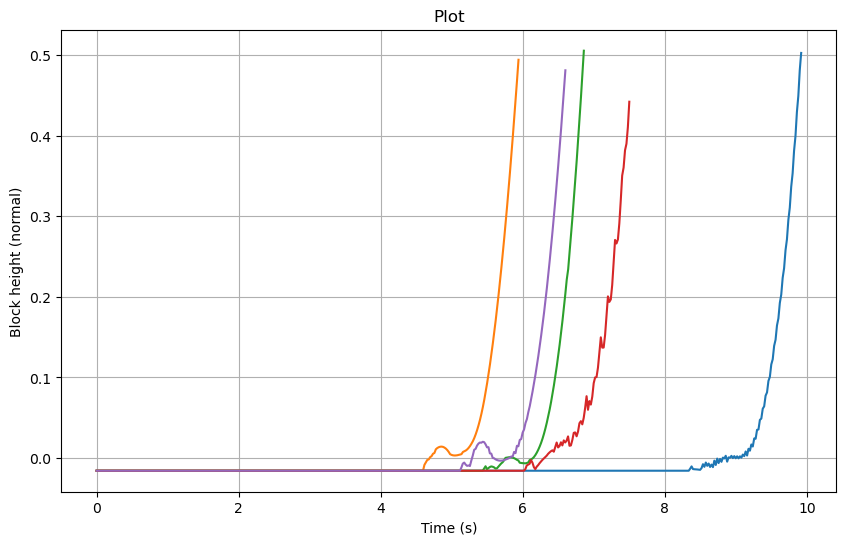

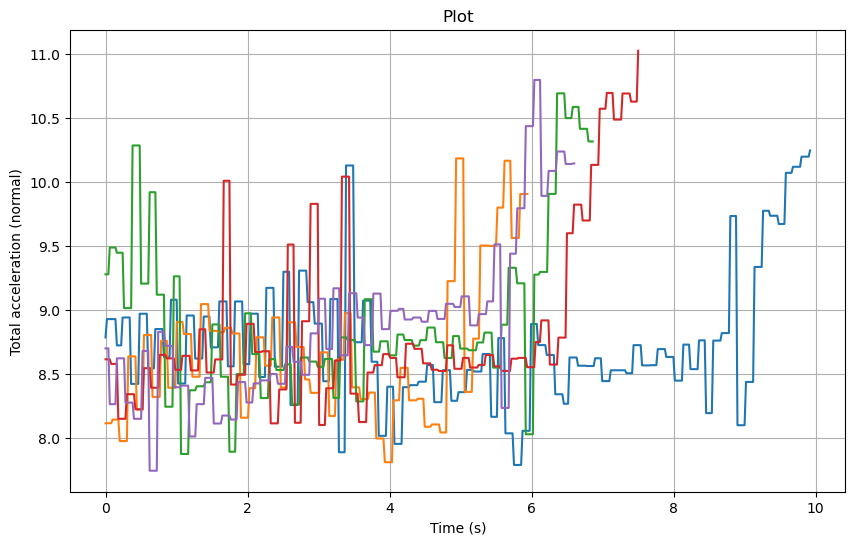

In [101]:
make_plot(normals, 0, "Distance to block (normal)")
make_plot(normals, 1, "Block height (normal)")
make_plot(normals, 2, "Total acceleration (normal)")

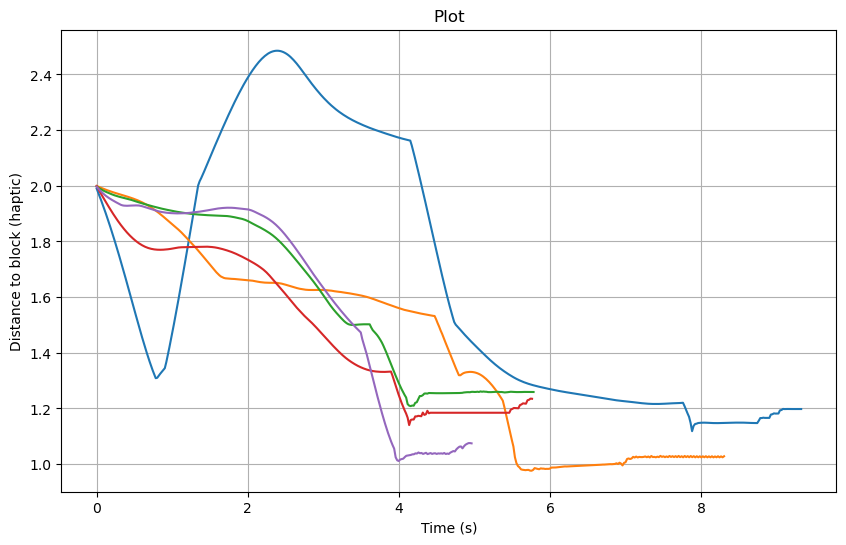

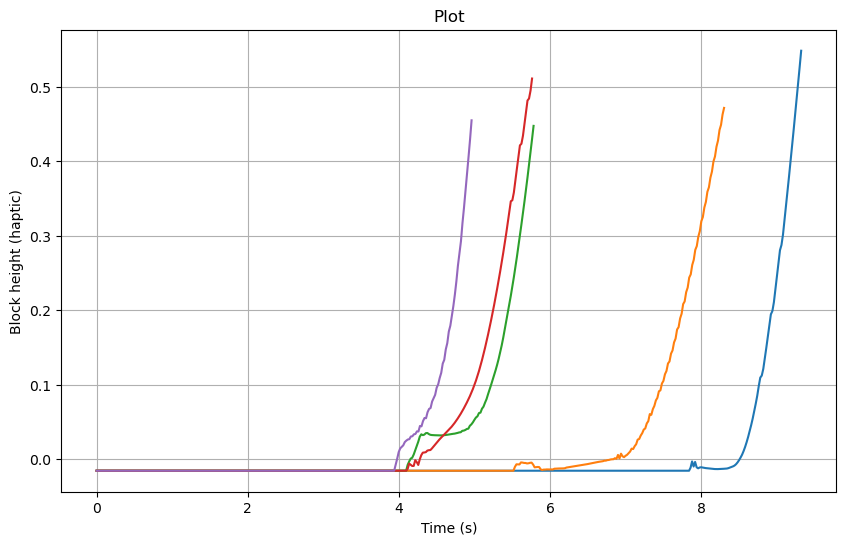

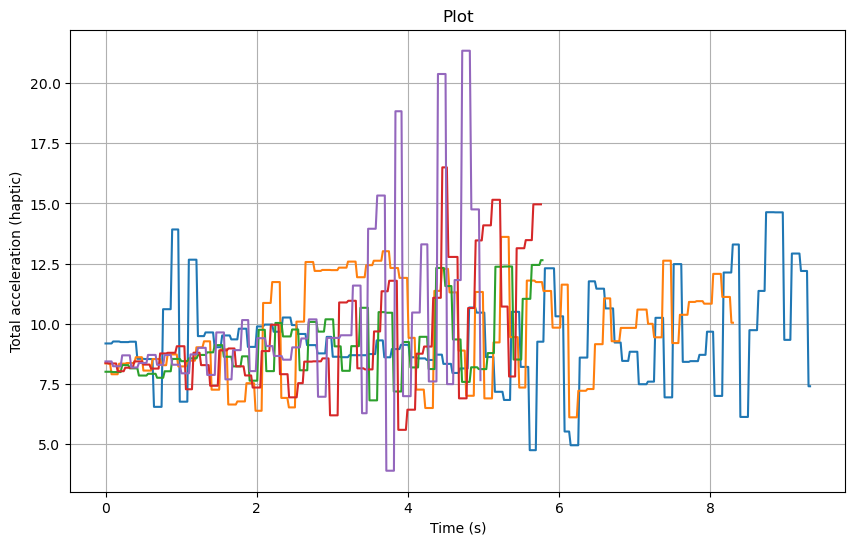

In [93]:
make_plot(haptics, 0, "Distance to block (haptic)")
make_plot(haptics, 1, "Block height (haptic)")
make_plot(haptics, 2, "Total acceleration (haptic)")